In [1]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
from astropy.convolution import Gaussian2DKernel
#import herschelhelp.cutouts_server as ctts
import scipy

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
#from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting,utils
import pyvo as vo
import glob

import copy

In [2]:
lofar_orig = Table.read('../data/data_release/final_cross_match_catalogue-v1.0.fits')
print(len(lofar_orig))
lofar_orig[0]

31610


Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,EBV,FUV_flux_corr,FUV_fluxerr_corr,FUV_mag_corr,FUV_magerr_corr,NUV_flux_corr,NUV_fluxerr_corr,NUV_mag_corr,NUV_magerr_corr,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,i_flux_corr,i_fluxerr_corr,i_mag_corr,i_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,g_hsc_flux_corr,g_hsc_fluxerr_corr,g_hsc_mag_corr,g_hsc_magerr_corr,r_hsc_flux_corr,r_hsc_fluxerr_corr,r_hsc_mag_corr,r_hsc_magerr_corr,i_hsc_flux_corr,i_hsc_fluxerr_corr,i_hsc_mag_corr,i_hsc_magerr_corr,z_hsc_flux_corr,z_hsc_fluxerr_corr,z_hsc_mag_corr,z_hsc_magerr_corr,y_hsc_flux_corr,y_hsc_fluxerr_corr,y_hsc_mag_corr,y_hsc_magerr_corr,nb921_hsc_flux_corr,nb921_hsc_fluxerr_corr,nb921_hsc_mag_corr,nb921_hsc_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,Z_SOURCE,Z_QUAL,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,2RXS_ID,XMMSL2_ID,ap_to_model_g,ap_to_model_err_g,ap_to_model_r,ap_to_model_err_r,ap_to_model_z,ap_to_model_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,Nfilts,u_rest,g_rest,r_rest,i_rest,z_rest,y_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest,XID+_rerun_mips,XID+_rerun_pacs,XID+_rerun_SPIRE
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,f

In [77]:
fname = '../data/image_full_ampphase_di_m.NS.psf.fits'
hdulist = fits.open(fname)
radim_header_psf = hdulist[0].header
radim_wcs_psf = wcs.WCS(radim_header_psf).celestial
radim_data_psf = hdulist[0].data[0][0]
radim_pixsize = abs(radim_wcs_psf.wcs.cdelt[0])*3600
hdulist.close()

fname = '../data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0].astype('f4')*1000 #convert to mJy
hdulist.close()
radim_header['NAXIS']=2
radim_header['WCSAXES']=2

fname = '../data/data_release/radio_rms_image.fits'
hdulist = fits.open(fname)
radim_header_err = hdulist[0].header
radim_wcs_err = wcs.WCS(radim_header_err).celestial
radim_err = hdulist[0].data[0][0].astype('f4')*1000 #convert to mJy
hdulist.close()

fname = '../data/data_release/image_full_ampphase_di_m.NS.mask01-2.fits'
hdulist = fits.open(fname)
radim_header_mask = hdulist[0].header
mask_deconv_wcs = wcs.WCS(radim_header_mask).celestial
mask_deconv = hdulist[0].data[0][0]
hdulist.close()

fname = '../data/radio_images/image_full_ampphase_di_m.NS.int.residual.fits'
hdulist = fits.open(fname)
radim_header_residual = hdulist[0].header
radim_wcs_residual = wcs.WCS(radim_header_mask).celestial
radim_residual = hdulist[0].data[0][0]
radim_pval = radim_residual*np.nan
radim_residual_comp = radim_residual*np.nan
hdulist.close()

  'HZ' -> 'Hz'. [astropy.wcs.wcs]
  'HZ' -> 'Hz'.


In [79]:
radim_header_residual

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                19845                                                  
NAXIS2  =                19845                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
WCSAXES =                    4 / Number of coordinate axes                      
CRPIX1  =               9923.0 / Pixel coordinate of reference point            
CRPIX2  =               9923.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRPIX4  =                  1.0 / Pixel coordinate of reference point            
CDELT1  = -0.000416666666666

In [28]:
file_list = glob.glob('data/xidplus_results/pybdsf/*/*.pkl')

for n,file in enumerate(file_list):
    prior,posterior = xidplus.load(file)
    cat_tmp = xidplus.catalogue.create_LOFAR_cat(posterior,prior[0])
    if n==0:
        catalogue = Table.read(cat_tmp)
        print(len(catalogue))
    else:
        cat_tmp = Table.read(cat_tmp)
        print(len(cat_tmp))
        catalogue = vstack([catalogue,cat_tmp])
        
catalogue.rename_column('help_id','Source_Name')
catalogue_sources = join(catalogue,lofar_orig,keys='Source_Name',)

5
3
6
3
2
7
5
7
4
4
2
4
5
3
3
6
2
7
3
6
2
4
2
5
2
3
3
3
4
5
4
3
6
2
3
5
3
4
5
6
7
5
4
4
6
3
4
2
8
2
6
4
8
1
4
4
4
3
4
5
6
5
5
5
2
8
3
9
2
6
5
5
3
5
3
6
5
5
4
4
8
5
8
3
5
9
7
3
4
4
2
2
6
3
3
4
3
1
1
5
8
6
4
5
5
7
4
5
3
5
7
2
3
4
3
3
5
2
2
6
3
5
8
4
4
5
6
5
4
3
7
4
4
5
5
5
6
4
4
5
6
2
4
6
4
5
2
3
4
5
1
7
3
3
7
4
2
4
4
6
3
4
6
4
2
4
2
4
6
3
6
7
4
5
4
3
3
2
5
3
2
2
7
7
1
6
3
4
7
5
6
5
7
4
4
7
2
5
9


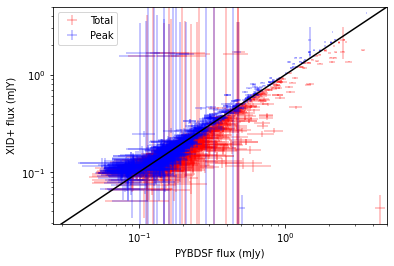

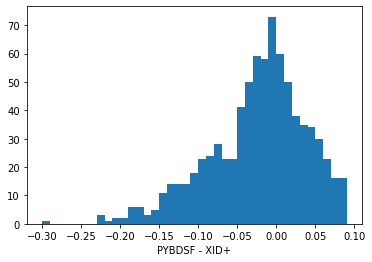

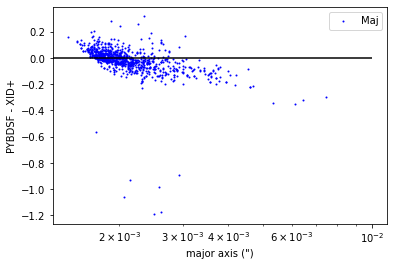

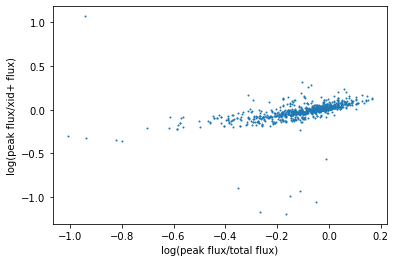

In [27]:
x = catalogue['Total_flux']*1000
xerr = catalogue['E_Total_flux']*1000
y = catalogue['F_LOFAR_150']
yerr = catalogue['FErr_LOFAR_150_u'] - catalogue['FErr_LOFAR_150_l']

plt.errorbar(x,y,xerr=xerr,yerr=yerr,linestyle='',c='red',label='Total',alpha=0.3)

x = catalogue['Peak_flux']*1000
xerr = catalogue['E_Peak_flux']*1000
y = catalogue['F_LOFAR_150']
yerr = catalogue['FErr_LOFAR_150_u'] - catalogue['FErr_LOFAR_150_l']

plt.errorbar(x,y,xerr=xerr,yerr=yerr,linestyle='',c='blue',label='Peak',alpha=0.3)

plt.plot([0,100],[0,100],c='black')
plt.yscale('log')
plt.xscale('log')


plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('PYBDSF flux (mJy)')
plt.ylabel('XID+ flux (mJY)')
plt.legend()
plt.show()



diff = np.log10(x/y)
plt.hist(diff,bins=np.arange(-0.3,0.1,0.01))
plt.xlabel('PYBDSF - XID+')
plt.show()


x = catalogue['Maj']
y = diff
plt.scatter(x,y,c='blue',label='Maj',s=1)

plt.hlines(0,xmin=0,xmax=0.01,color='black')
plt.xscale('log')
plt.xlabel('major axis (")')
plt.ylabel('PYBDSF - XID+')
plt.legend()
plt.show()

x = np.log10(catalogue['Peak_flux']/catalogue['Total_flux'])
y = diff
plt.scatter(x,y,s=1)
#plt.xscale('log')
plt.xlabel('log(peak flux/total flux)')
plt.ylabel('log(peak flux/xid+ flux)')
plt.show()

In [29]:
file_list = glob.glob('data/xidplus_results/pybdsf_components/*/*.pkl')

for n,file in enumerate(file_list):
    prior,posterior = xidplus.load(file)
    cat_tmp = xidplus.catalogue.create_LOFAR_cat(posterior,prior[0])
    if n==0:
        catalogue = Table.read(cat_tmp)
        print(len(catalogue))
    else:
        cat_tmp = Table.read(cat_tmp)
        print(len(cat_tmp))
        catalogue = vstack([catalogue,cat_tmp])
        
catalogue.rename_column('help_id','Source_Name')
catalogue_components = join(catalogue,lofar_orig,keys='Source_Name',)

5
3
6
3
2
7
5
7
4
4
2
4
5
3
3
6
2
7
3
6
2
4
2
5
2
3
3
3
4
5
6
2
3
5
3
4
5
6
7
5
4
4
6
3
4
2
2
6
4
8
1
4
4
4
3
4
5
6
5
5
5
2
8
3
9
2
6
5
5
3
3
5
5
4
4
8
5
8
3
5
9
7
3
4
4
2
2
6
3
3
4
3
1
1
5
8
6
4
5
5
7
4
5
3
5
7
2
3
4
3
3
5
2
2
6
3
5
8
4
4
4
5
6
5
4
3
7
4
4
5
5
5
6
4
4
5
6
2
4
6
4
5
2
3
4
5
1
7
3
3
7
4
2
4
4
6
3
4
6
4
2
4
2
4
6
3
6
7
4
5
4
3
3
2
5
3
2
2
7
7
1
6
3
4
7
5
6
5
7
4
4
7
2
5
9


In [32]:
catalogue = join(catalogue_sources,catalogue_components,keys='Source_Name',table_names=['sources','components'])

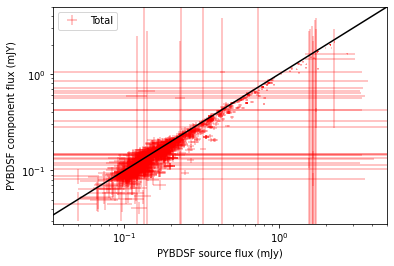

In [34]:
x = catalogue['F_LOFAR_150_sources']
xerr = catalogue['FErr_LOFAR_150_u_sources'] - catalogue['FErr_LOFAR_150_l_sources']
y = catalogue['F_LOFAR_150_components']
yerr = catalogue['FErr_LOFAR_150_u_components'] - catalogue['FErr_LOFAR_150_l_components']

plt.errorbar(x,y,xerr=xerr,yerr=yerr,linestyle='',c='red',label='Total',alpha=0.3)




plt.plot([0,100],[0,100],c='black')
plt.yscale('log')
plt.xscale('log')


plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('PYBDSF source flux (mJy)')
plt.ylabel('PYBDSF component flux (mJY)')
plt.legend()
plt.show()

## Create a combined fits image of the pvalue maps

([<aplpy.core.FITSFigure at 0x2aab2d0b1690>],
 <Figure size 720x720 with 2 Axes>)

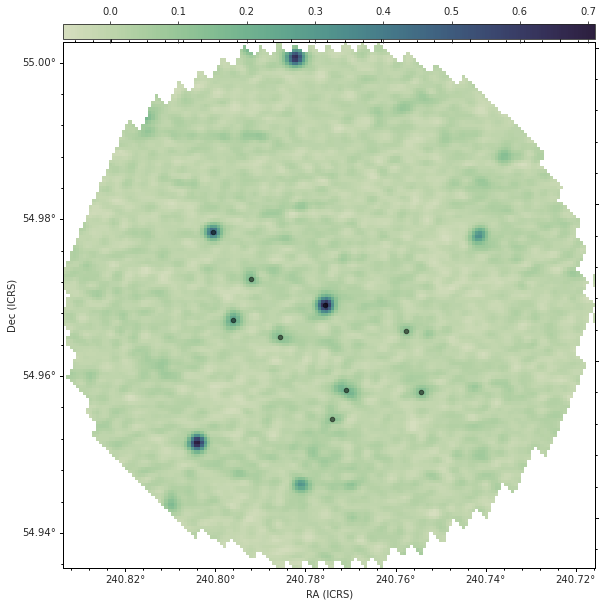

In [75]:
xidplus.plot_map(prior)

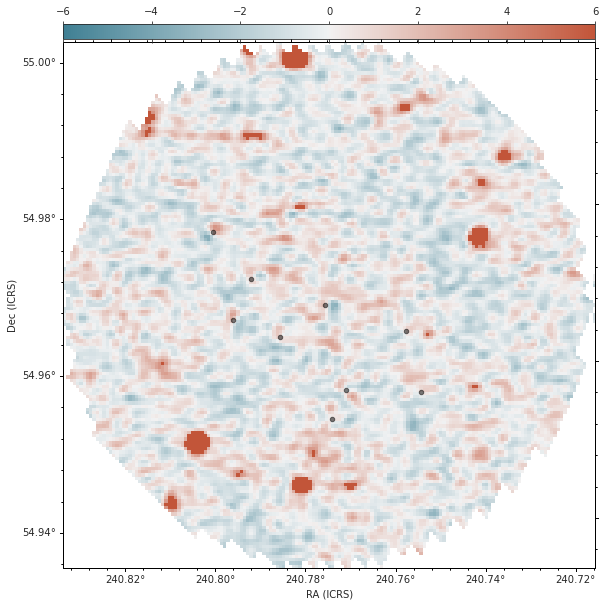

In [36]:
figs,fig=xidplus.plot_Bayes_pval_map(prior, posterior)

In [78]:
file_list = glob.glob('data/xidplus_results/pybdsf_components/*/*.pkl')

for n,file in enumerate(file_list):
    if (n%20==0):
        print(n)
    prior,posterior = xidplus.load(file)

    post_rep_map=postmaps.replicated_maps(prior,posterior,nrep=2000)

    Bayesian_Pval=postmaps.make_Bayesian_pval_maps(prior[0],post_rep_map[0])
    Bayes_24_map=postmaps.make_fits_image(prior[0],Bayesian_Pval)

    x_ind,y_ind=np.meshgrid(np.arange(0,Bayes_24_map[1].header['NAXIS1'],dtype=np.int16)-Bayes_24_map[1].header['CRPIX1']+radim_header_residual['CRPIX1'],np.arange(0,Bayes_24_map[1].header['NAXIS2'],dtype=np.int16)-Bayes_24_map[1].header['CRPIX2']+radim_header_residual['CRPIX2'])

    good=Bayes_24_map[1].data>-6
    radim_residual_comp = radim_residual[y_ind[good].astype(np.int16),x_ind[good].astype(np.int16)]
    radim_pval[y_ind[good].astype(np.int16),x_ind[good].astype(np.int16)] = Bayes_24_map[1].data[good]

0
20
40
60
80
100
120
140
160
180


In [42]:
post_rep_map=postmaps.replicated_maps(prior,posterior,nrep=2000)

Bayesian_Pval=postmaps.make_Bayesian_pval_maps(prior[0],post_rep_map[0])

Bayes_24_map=postmaps.make_fits_image(prior[0],Bayesian_Pval)
Bayes_24_map.writeto('test_LOFAR_Bayes_Pval.fits',overwrite=True)

In [71]:
x_ind,y_ind=np.meshgrid(np.arange(0,Bayes_24_map[1].header['NAXIS1'],dtype=np.int16)-Bayes_24_map[1].header['CRPIX1']+radim_header_residual['CRPIX1'],np.arange(0,Bayes_24_map[1].header['NAXIS2'],dtype=np.int16)-Bayes_24_map[1].header['CRPIX2']+radim_header_residual['CRPIX2'])

good=Bayes_24_map[1].data>-6
residual_data = radim_residual[y_ind[good].astype(np.int16),x_ind[good].astype(np.int16)].flatten()
pval_data = Bayes_24_map[1].data[good].flatten()

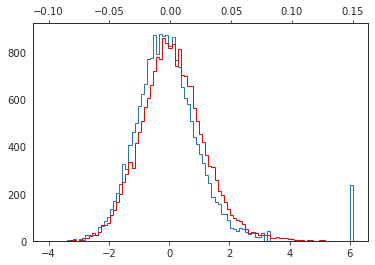

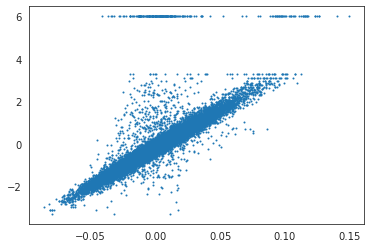

In [73]:
ax = plt.axes()

ax.hist(pval_data,bins=np.linspace(-4,6.1,100),histtype='step')
ax2 = ax.twiny()
ax2.hist(residual_data*1000,bins=np.linspace(-0.1,0.15,100),histtype='step',color='red')
plt.show()

x = residual_data*1000
y = pval_data
plt.scatter(x,y,s=1)

## compare results when fitting using the restoring beam vs the true shape

In [113]:
file_list = glob.glob('data/xidplus_results/pybdsf_components/*/*restoring_beam')
file_names = np.array([])
for n,file in enumerate(file_list):

    if n==0:
        catalogue = Table.read(file)
        file_name = np.array([file for n in range(len(catalogue))])
        file_names = np.append(file_names,file_name)
    else:
        cat_tmp = Table.read(file)
        file_name = np.array([file for n in range(len(cat_tmp))])
        file_names = np.append(file_names,file_name)
        catalogue = vstack([catalogue,cat_tmp])
        
col_filename = Column(name='fileName',data=file_names)
catalogue.add_column(col_filename)
catalogue.rename_column('help_id','Source_Name')
catalogue_components_restoring_beam = join(catalogue,lofar_orig,keys='Source_Name',)

In [114]:
catalogue_components_joined = join(catalogue_components,catalogue_components_restoring_beam,keys='Source_Name',table_names=['true_psf','restoring_beam'])

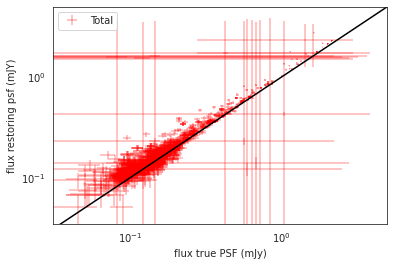

In [117]:
x = catalogue_components_joined['F_LOFAR_150_true_psf']
xerr = catalogue_components_joined['FErr_LOFAR_150_u_true_psf'] - catalogue_components_joined['FErr_LOFAR_150_l_true_psf']
y = catalogue_components_joined['F_LOFAR_150_restoring_beam']
yerr = catalogue_components_joined['FErr_LOFAR_150_u_restoring_beam'] - catalogue_components_joined['FErr_LOFAR_150_l_restoring_beam']

plt.errorbar(x,y,xerr=xerr,yerr=yerr,linestyle='',c='red',label='Total',alpha=0.3)




plt.plot([0,100],[0,100],c='black')
plt.yscale('log')
plt.xscale('log')


plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('flux true PSF (mJy)')
plt.ylabel('flux restoring psf (mJY)')
plt.legend()
plt.show()



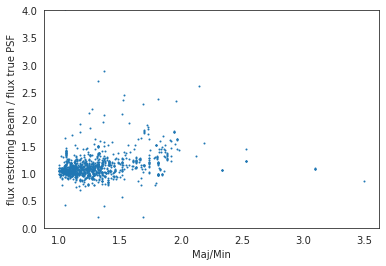

In [127]:
x = catalogue_components_joined['F_LOFAR_150_true_psf']
y = catalogue_components_joined['F_LOFAR_150_restoring_beam']

flux_ratio = y/x
size_ratio = catalogue_components_joined['Maj_true_psf']/catalogue_components_joined['Min_true_psf']
plt.scatter(size_ratio,flux_ratio,s=1)

plt.ylim(0,4)
plt.xlabel('Maj/Min')
plt.ylabel('flux restoring beam / flux true PSF')
plt.show()


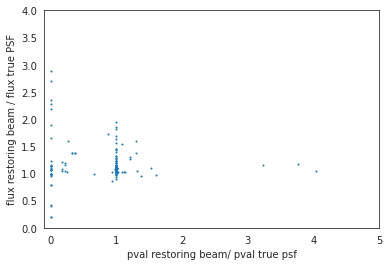

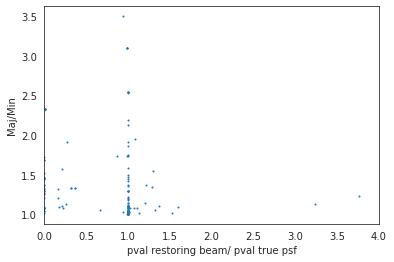

In [168]:
x = catalogue_components_joined['F_LOFAR_150_true_psf']
y = catalogue_components_joined['F_LOFAR_150_restoring_beam']

flux_ratio = y/x
pval_ratio = catalogue_components_joined['Pval_res_150_restoring_beam']/catalogue_components_joined['Pval_res_150_true_psf']
plt.scatter(pval_ratio,flux_ratio,s=1)

plt.xlim(-0.1,5)
plt.ylim(0,4)
plt.xlabel('pval restoring beam/ pval true psf')
plt.ylabel('flux restoring beam / flux true PSF')
plt.show()


size_ratio = catalogue_components_joined['Maj_restoring_beam']/catalogue_components_joined['Min_restoring_beam']
plt.scatter(pval_ratio,size_ratio,s=1)

plt.xlim(0,4)
plt.xlabel('pval restoring beam/ pval true psf')
plt.ylabel('Maj/Min')
plt.show()



In [153]:
mask = (flux_ratio>2) & (flux_ratio<3)
files_check = np.unique(catalogue_components_joined[mask]['fileName'])
file_check = files_check[3]

file_num = [s for s in file_check.split('_') if s.isdigit()][0]
file_check_true_psf = 'data/xidplus_results/pybdsf_components/xidplus_run_{}/lofar_xidplus_fir_{}_rerun.pkl.pkl'.format(file_num,file_num)

prior,posterior = xidplus.load(file_check + '.pkl.pkl')

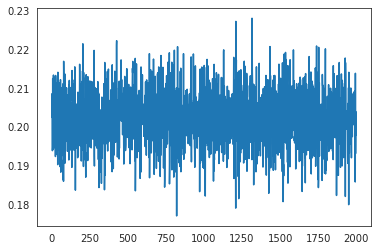

In [143]:
y = posterior.samples['src_f'][:2000,0,0]
plt.plot(y)

([<aplpy.core.FITSFigure at 0x2aab5dac2d10>],
 <Figure size 720x720 with 2 Axes>)

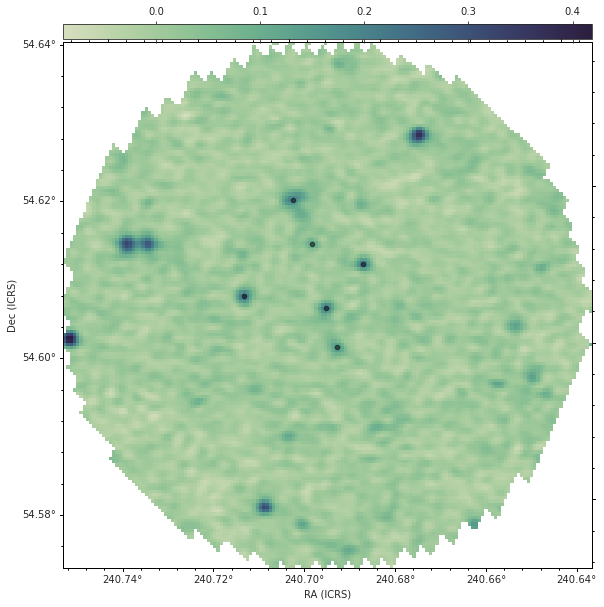

In [144]:
xidplus.plot_map(prior)

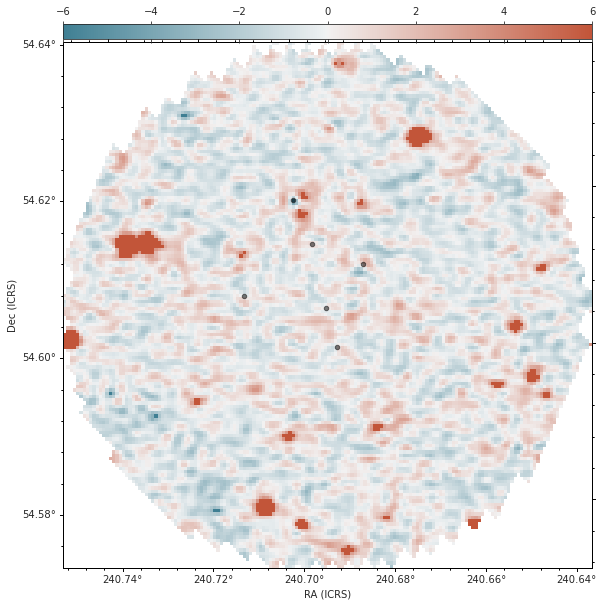

In [145]:
figs,fig=xidplus.plot_Bayes_pval_map(prior, posterior)

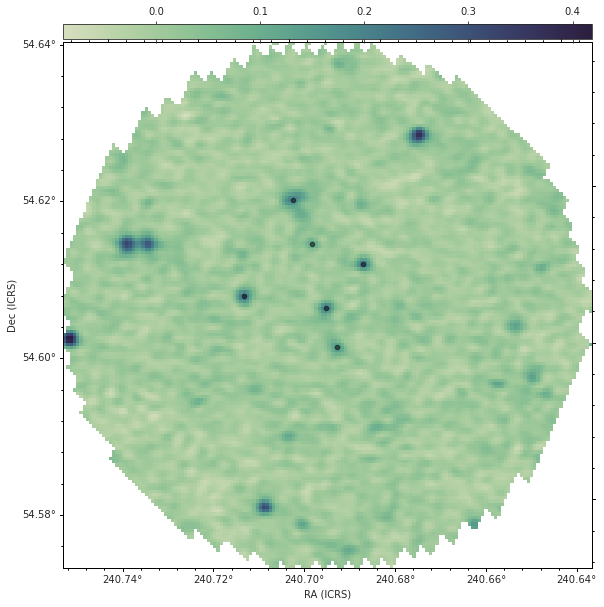

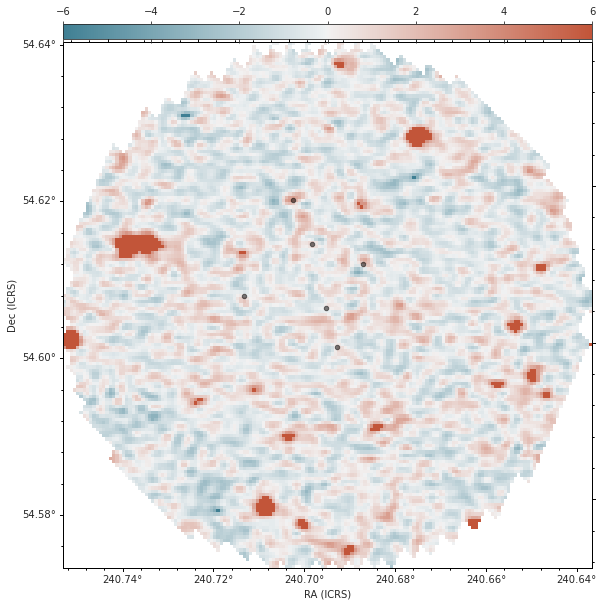

In [156]:
prior,posterior = xidplus.load(file_check_true_psf)
xidplus.plot_map(prior)
plt.show()

figs,fig=xidplus.plot_Bayes_pval_map(prior, posterior)
plt.show()